# Forecasting the Future: Exploring Patterns and Trends in Weather Data

# Table of Contents

1. [Introduction](#1.-Introduction)
    1.1 [About The Dataset](#1.1-About-The-Dataset)
2. [Importing the Dataset](#2.-Importing-the-Dataset)
    2.1 [Data Assessment](#2.1-Data-Assessment)
3. [Data Cleaning](#3.-Data-Cleaning)    
4. [Feature(s) of Interest](#4.-Feature(s)-of-Interest)
5. [Dataset Exploration](#5.-Dataset-Exploration)
    5.1 [Univariate Exploration](#5.1-Univariate-Exploration)
    5.2 [Bivariate Exploration](#5.2-Bivariate-Exploration)
    5.3 [Multivariate Exploration](#5.3-Multivariate-Exploration)
    5.4 [Summary of Findings](#5.4-Summary-of-Findings) 
6.[Prediction With Machine Learning](#7.-Prediction-With-Machine-Learning)
    6.1 [Transforming Categorical Variables](#6.1-Transforming-Categorical-Variables)   
    6.2 [Training Data and Test Data](#6.2-Training-Data-and-Test-Data)
7. [Models](#7.-Models)
    7.1 [Linear Regression](#7.1-Linear-Regression)
    7.2 [K-Nearest Neighbors (KNN)](#7.2-K-Nearest-Neighbors-(KNN))
    7.3 [Decision Tree](#7.3-Decision-Tree)
    7.4 [Logistic Regression](#7.4-Logistic-Regression)
    7.5 [SVM](#7.5-SVM)
8. [Report](#8.-Report)
9. [Conclusion](#9.-Conclusion)

# 1. Introduction


This project explores a weather dataset containing 3,271 days of weather information with 22 variables on each day, including Date, Rainfall, Sunshine, Rain_Today, and many others. The main goal of the exploration was to determine the factors that affect rainfall and to use machine learning algorithms to predict the possibility of rain tomorrow.

## 1.1 About The Dataset

The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


In [79]:
#Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [80]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn import linear_model
import seaborn as sb

# 2. Importing the Dataset


In [81]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')

df.head(2)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes


## 2.1 Data Assessment

### `Visual Assessment`

Visual assessment of the dataset was done using microsoft excel. the dataset was assessed and some quality issues and tidiness were notice and documented.

### `Assessing data programatically`

In [82]:
df.shape

(3271, 22)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [84]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


### `Quality issues`

- Determination of Average of min and max tempreture 

## 3. Data Cleaning

In [85]:
#Coping the dataset for cleaning purpose
df_clean = df.copy()

## `Issue:`


### `Define:`
To have an accurate Tempreture per day i calculate the average Tempreture min and max 

### `Code`

In [86]:
df_clean['Average_temp'] = (df_clean['MinTemp'] + df_clean['MaxTemp']) / 2

### `Test`

In [87]:
df_clean.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Average_temp
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes,20.95
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes,22.55
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes,23.05
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes,21.50
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes,22.70


## 4. Feature(s) of Interest

### What is/are the main feature(s) of interest in the dataset?

> I'm most interested in determining those factors that have effect on `Rainfall` and also using machine learning algorithm to predict possibility of `Rain_Tomorrow`. 


### What features in the dataset will help support the investigation into the feature(s) of interest?

> I expect that `Temperature` will have the strongest effect on the `Rain_Today` and also `Sunshine, WindGustDir, WindGustSpeed, Humidity9am, Pressure9am and Cloud9am` will have effects on the `Rain_Today`, though to a much smaller degree than the main effect of `Temperature`.


# 5. Dataset Exploration

## 5.1 Univariate Exploration

### RainToday Distribution

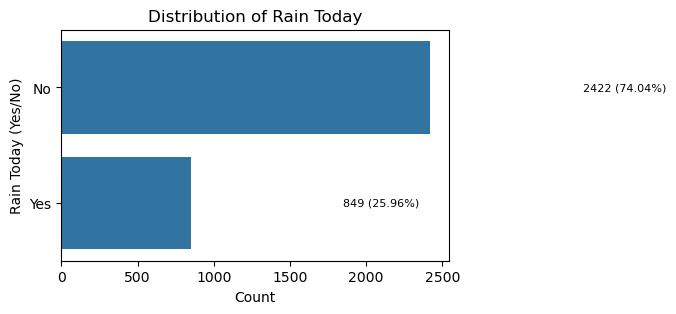

In [88]:
#ploting distribution of RainToday using bar chart

total_listings = df_clean.shape[0]
plt.figure(figsize = (5, 3))
# Ploting the RainToday on a Horizontal bar chart
base_color = sb.color_palette()[0]
Rain_Today = df_clean.RainToday.value_counts().index
sb.countplot(data = df_clean, y = 'RainToday', color = base_color
              , order = Rain_Today); 
plt.xlabel('Count')
plt.ylabel('Rain Today (Yes/No)')
plt.title("Distribution of Rain Today")

# retrieve locations of yticks
locs = plt.yticks()[0]

# number of listings in descending order for each days
Rain_Todays = df_clean.RainToday.value_counts()

for loc, Rains in zip(locs, Rain_Today):
    # number of listings for the given day
    Rain = Rain_Todays[Rains]
    
    # calculate the proportion of the score in % [format: score count (proportion)]
    Rains_proportion = '{} ({:0.2f}%)'.format(Rain, 100*Rain/total_listings)
    
    # annotate the proportion of the state to the right of its corresponding bar
    plt.text(x = Rain + 1000, y = loc, s = Rains_proportion, va = 'center', color = 'black', fontsize = 8)

Looking at the distribution of rain today, 2422 days which represent 74% of the dataset has No rain while it rains in 849 days (25.96%) of the dataset. This shows that it rains in 1/4 days of the dataset.

### Distribution of Average Temprature

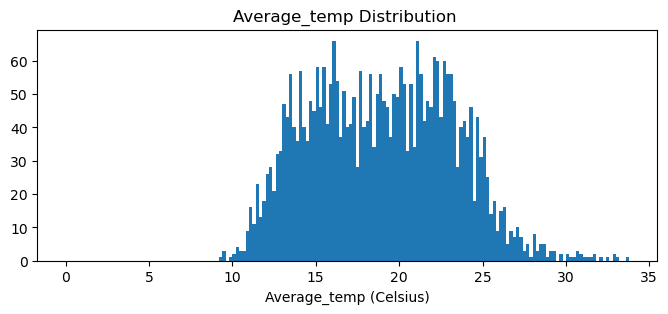

In [89]:
#Ploting Average_temp distribution using matplotlib hist() plot function 

# I start with a standard-scaled plot
df =df_clean[np.isfinite(df_clean['Average_temp'])]
binsize = 0.2
bins = np.arange(0, df_clean['Average_temp'].max()+binsize, binsize)

plt.figure(figsize=[8, 3])
plt.hist(data = df_clean, x = 'Average_temp', bins = bins)
plt.xlabel('Average_temp (Celsius)')
plt.title("Average_temp Distribution ")
plt.show()


The irregularity in the distribution of Average Temperature was accentuated by the histogram above which plotted the distribution of the Average Temperature ranging from approximately 10 to 34 degree Celsius. Although the overall distribution appeared to be right-skewed, peaks were observed in non-adjacent bins such as around 16C, 21C, and 22c.

### Exploring Average Temperature further with log scale


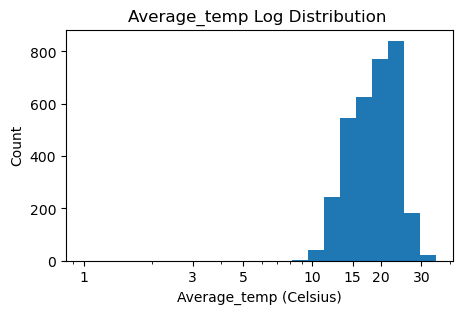

In [90]:
# distribution of Average_temp in log scale

plt.figure(figsize = (5, 3))
log_data = np.log10( df_clean.query('Average_temp > 0').Average_temp)
# bin edges for log scale
log_binsize = 0.07 # selected after visually inspecting the distribution of the log scale data
log_bins = 10 ** np.arange(0, log_data.max()+log_binsize, log_binsize)

# histogram with x-axis in log scale
plt.hist(x = df_clean.Average_temp, bins = log_bins)
plt.xscale('log')

# custom labels for xticks
locs = [1, 3, 5, 10, 15, 20, 30]
labels = ['{}'.format(loc) for loc in locs]
plt.xticks(locs, labels)

plt.xlabel('Average_temp (Celsius)')
plt.title("Average_temp Log Distribution ")
plt.ylabel('Count');

Applying a log transformation to Average temperature indicate the highest temperature to approximately 21-24 degree Celsius.

### Distribution of Sunshine

Text(0.5, 1.0, 'Distribution of Sunshine')

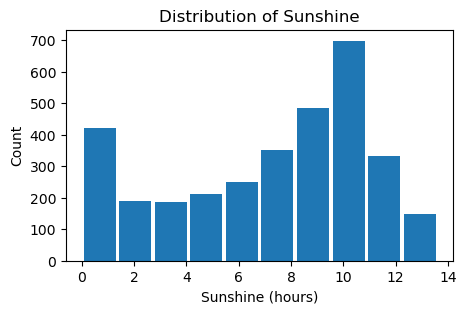

In [91]:
# Ploting Sunshine distribution using histogram chart plotted with matplotlib .hist() plot function
plt.figure(figsize = (5, 3))
 
plt.hist(data = df_clean, x = 'Sunshine', rwidth = 0.9); 
plt.xlabel('Sunshine (hours)')
plt.ylabel('Count')
plt.title("Distribution of Sunshine")

The histogram plot for sunshine shows the highest sunshine to be 8-11 hours with approximately 700 listing and the lowest sunshine is around 1-4 hours.  

### Distribution of Wind Gust Direction

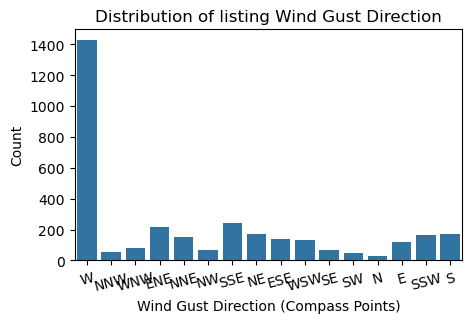

In [92]:
# Ploting Wind Gust Direction with bar chart  
plt.figure(figsize = (5, 3))
default_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'WindGustDir', color = default_color)
plt.xlabel("Wind Gust Direction (Compass Points)")         
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.title("Distribution of listing Wind Gust Direction")
plt.show()

The bar chart distribution shows that most days have West Wind Gust Direction of 1400 on the listing and the Wind Gust least Direction from the dataset is north.

### Distribution of Wind Gust Speed

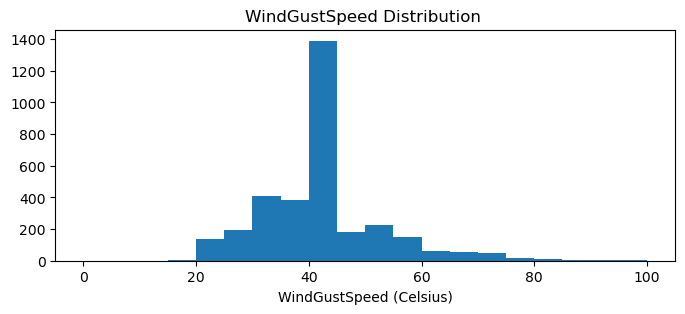

In [93]:
#Ploting Wind Gust Speed distribution using matplotlib hist() plot function 

# I start with a standard-scaled plot
df =df_clean[np.isfinite(df_clean['WindGustSpeed'])]
binsize = 5
bins = np.arange(0, df_clean['WindGustSpeed'].max()+binsize, binsize)

plt.figure(figsize=[8, 3])
plt.hist(data = df_clean, x = 'WindGustSpeed', bins = bins)
plt.xlabel('WindGustSpeed (Celsius)')
plt.title("WindGustSpeed Distribution ")
plt.show()

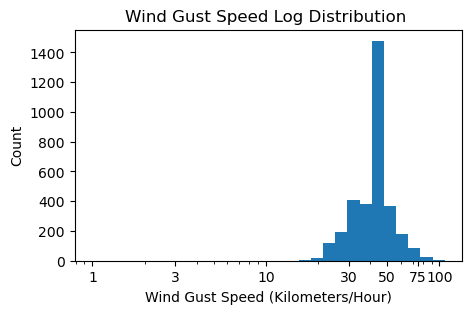

In [94]:
# distribution of Wind Gust Speed duration in log scale
plt.figure(figsize = (5, 3))
log_data = np.log10( df_clean.query('WindGustSpeed> 0').WindGustSpeed)
# bin edges for log scale
log_binsize = 0.07 # selected after visually inspecting the distribution of the log scale data
log_bins = 10 ** np.arange(0, log_data.max()+log_binsize, log_binsize)

# histogram with x-axis in log scale
plt.hist(x = df_clean.WindGustSpeed, bins = log_bins)
plt.xscale('log')

# custom labels for xticks
locs = [1,3 , 10, 30, 50, 75, 100]
labels = ['{}'.format(loc) for loc in locs]
plt.xticks(locs, labels)

plt.xlabel('Wind Gust Speed (Kilometers/Hour)')
plt.title("Wind Gust Speed Log Distribution ")
plt.ylabel('Count');

The irregularity was noticed in the distribution of the wind gust speed with both normal distribution and the log distribution on the histogram above ranging from approximately 15 to 100. Although the overall distribution appeared to be right-skewed, peaks were observed in non-adjacent bin 40-49.

### Distribution of Humidity

Text(0.5, 1.0, 'Distribution of Humidity')

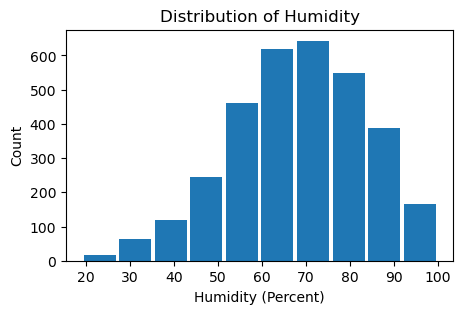

In [95]:
# Ploting  Humidity distribution using histogram chart plotted with matplotlib .hist() plot function
plt.figure(figsize = (5, 3))
 
plt.hist(data = df_clean, x = 'Humidity9am', rwidth = 0.9); 
plt.xlabel('Humidity (Percent)')
plt.ylabel('Count')
plt.title("Distribution of Humidity")

Histogram distribution of humidity illustrated above indicate that the highest humidity percentage is bin 60-75 at approximately 600 listing. Although Irregularity was noticed in the distribution of the humidity which ranging from 20 to 100 percentage but the overall distribution appeared to be right-skewed

### Distribution of Pressure 

Text(0.5, 1.0, 'Distribution of Pressure')

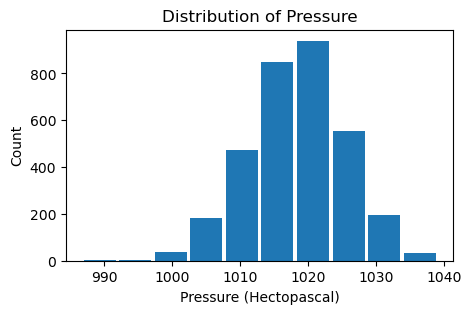

In [96]:
# Ploting Pressure distribution using histogram chart plotted with matplotlib .hist() plot function
plt.figure(figsize = (5, 3))
 
plt.hist(data = df_clean, x = 'Pressure9am', rwidth = 0.9); 
plt.xlabel('Pressure (Hectopascal)')
plt.ylabel('Count')
plt.title("Distribution of Pressure")

Irregularity was noticed in the distribution of the Pressure which ranging from 0 to 1040 but the overall distribution appeared to be right-skewed. Histogram distribution of Pressure illustrated above indicate that the highest humidity percentage is bin 1000-1025 at approximately 900 listing.

### Distribution of Cloud

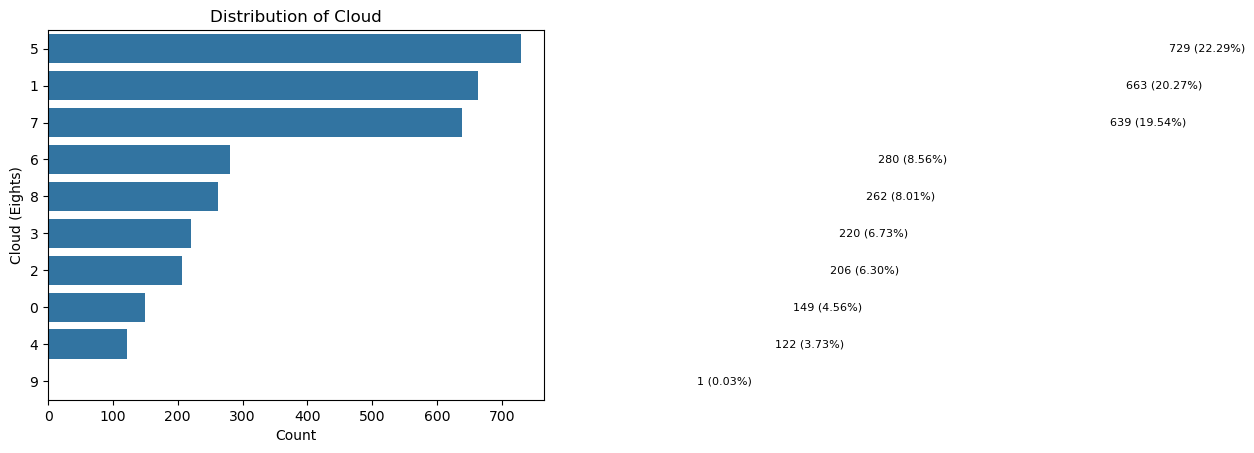

In [97]:
#ploting distribution of Cloud using bar chart

total_listings = df_clean.shape[0]

# Ploting the Cloud on a Horizontal bar chart
base_color = sb.color_palette()[0]
Cloud_Portion = df_clean.Cloud9am.value_counts().index
sb.countplot(data = df_clean, y = 'Cloud9am', color = base_color
              , order = Cloud_Portion); 
plt.xlabel('Count')
plt.ylabel('Cloud (Eights)')
plt.title("Distribution of Cloud")

# retrieve locations of yticks
locs = plt.yticks()[0]

# number of listings in descending order for each score
Claud_Portions = df_clean.Cloud9am.value_counts()

for loc, Clauds in zip(locs, Cloud_Portion):
    # number of listings for the given Cloud
    Cloud = Claud_Portions[Clauds]
    
    # calculate the proportion of the score in % [format: Cloud (proportion)]
    Clouds_proportion = '{} ({:0.2f}%)'.format(Cloud, 100*Cloud/total_listings)
    
    # annotate the proportion of the state to the right of its corresponding bar
    plt.text(x = Cloud + 1000, y = loc, s = Clouds_proportion, va ='center', color = 'black', fontsize = 8)

Distribution of cloud illustrated with bar chart shows that majority of listing as 5 Eights with 22.24% of the entire dataset and the least on the dataset is 9 Eights with 0.03%.

# 5.2 Bivariate Exploration

In [98]:
#Assigning variables
numeric_vars = ['Average_temp','Humidity9am', 'Sunshine', 'Pressure9am', 'Cloud9am', 'WindGustSpeed']
categoric_vars = ['WindGustDir','RainToday']

### Looking at the effect of Average_temp on the RainToday 

Text(0.5, 1.0, 'RainToday Vs Average_temp')

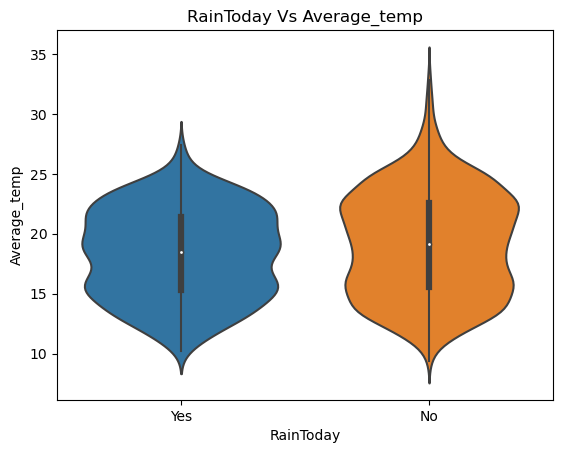

In [99]:
#Looking at the effect of Average_temp on raintoday using violinplot
#whether its rain
RainToday = ['Yes', 'No']

rain = pd.api.types.CategoricalDtype(ordered=True, categories=RainToday)

# Use pandas.astype() to convert the "RainToday" column from a plain object type into an ordered categorical type 
df_clean['RainToday'] = df_clean['RainToday'].astype(rain);

sb.violinplot(data=df_clean, x='RainToday', y='Average_temp');
plt.title("RainToday Vs Average_temp")

The violin plot above shows the relationship of Average temperature to Rain today. Median below 20c on Yes, indicate that there is possibility of raining with low temperature. The plot reveal that the distribution of No is more spread out than the distribution for Yes, with more outliers but the highest temperature of Yes is below 30c. There is higher probability of No rain when the temperature is higher than 30c.

### Effect of Wind Gust Direction on the RainToday

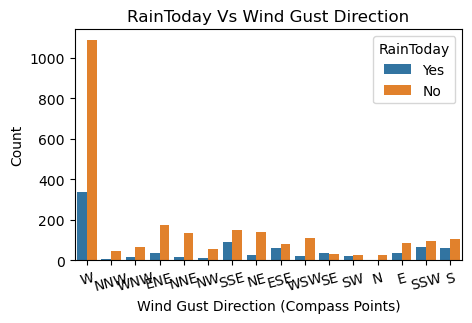

In [100]:
plt.figure(figsize = [5, 3])
sb.countplot(data = df_clean, x = 'WindGustDir', hue = 'RainToday')
plt.title("RainToday Vs Wind Gust Direction")
plt.xlabel("Wind Gust Direction (Compass Points)")         
plt.ylabel('Count')
plt.xticks(rotation=15);

The bar chart above shows the relationship between wind gust directions to rain today. West compass point have the highest No rain and also highest Yes rain but No rain have approximately 600 above Yes rain. The distribution illustrate that North compass point as very low probability for yes rain, likewise North-North-West. Determining the rainfall through wind gust direction is difficult but it could be illustrated further with more variable for better usage.

### Relationship of Humidity  and Sunshine  with RainToday

Text(0.5, 1.0, 'RainToday Vs Sunshine')

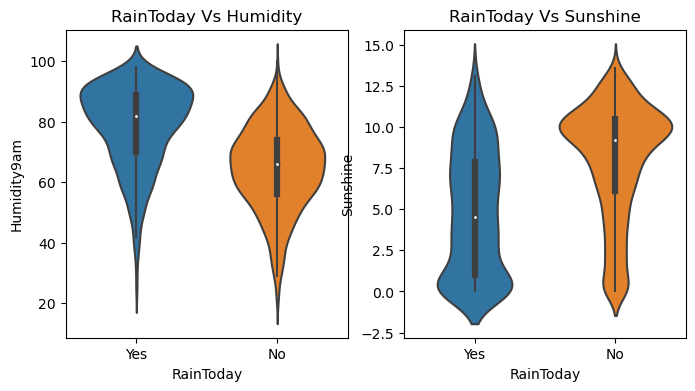

In [101]:
# whether its rain
plt.figure(figsize = [8, 4])
#LEFT PLOT
plt.subplot(1, 2, 1)
RainToday = ['Yes', 'No']

rain = pd.api.types.CategoricalDtype(ordered=True, categories=RainToday)

# Use pandas.astype() to convert the "RainToday" column from a plain object type into an ordered categorical type 
df_clean['RainToday'] = df_clean['RainToday'].astype(rain);

sb.violinplot(data=df_clean, x='RainToday', y='Humidity9am');
plt.title("RainToday Vs Humidity")

#RIGHT PLOT
plt.subplot(1, 2, 2)
RainToday = ['Yes', 'No']

rain = pd.api.types.CategoricalDtype(ordered=True, categories=RainToday)

# Use pandas.astype() to convert the "RainToday" column from a plain object type into an ordered categorical type 
df_clean['RainToday'] = df_clean['RainToday'].astype(rain);

sb.violinplot(data=df_clean, x='RainToday', y='Sunshine');
plt.title("RainToday Vs Sunshine")

The violin plot above shows the relationship of Humidity and Sunshine to Rain today. Humidity relationship with Rain Today shows Yes rain median of 80% which higher compare to the median of No rain of approximately 65%. It indicate that there is possibility of raining with higher Humidity. Looking at the Sunshine relationship with Rain today, Yes rain shows sunshine hours is below 5 hours when compare to No rain of above 7.5 hours sunshine. This indicate that low sunshine hour give high probability of rainfall.

### Relationship of Pressure and Wind Gust Speed with RainToday

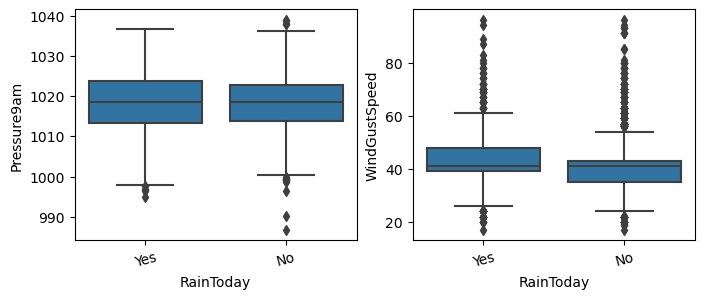

In [102]:
# Left plot
plt.figure(figsize = [8, 3])
plt.subplot(1, 2, 1)
sb.boxplot(data=df_clean, x='RainToday', y='Pressure9am', color=base_color)
plt.xticks(rotation=15);

# RIGHT plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='RainToday', y='WindGustSpeed', color=base_color)
plt.xticks(rotation=15);


The box plot shows the relationship between Pressure and Rainfall indicted that both Yes and No rain category have high pressure as both median is at 1019 Hectopascal. Although Yes category is positive skew and No category is negative skew while looking at the relationship between Wind Gust speed and the Rain today but there median is at approximately 40 kilometer/hour. This is redundant in determination of rainfall.    

### Effect of Cloud on the RainToday 

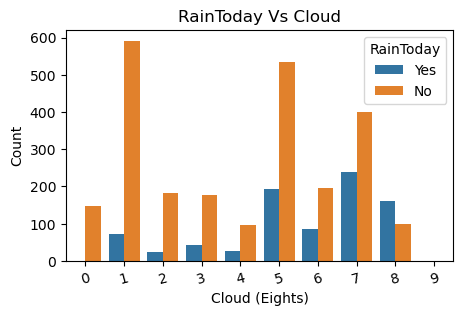

In [103]:
plt.figure(figsize = [5, 3])
sb.countplot(data = df_clean, x = 'Cloud9am', hue = 'RainToday')
plt.title("RainToday Vs Cloud")
plt.xlabel("Cloud (Eights)")         
plt.ylabel('Count')
plt.xticks(rotation=15);

Looking at the relationship of Cloud and the rainfall with the bar chart above. Cloud 0-7 have high level of No rain with little Yes in the listing and 8 and above have high Yes rain. This shows that the high the cloud eights the better.     

### Relationship between the Numeric Variables 

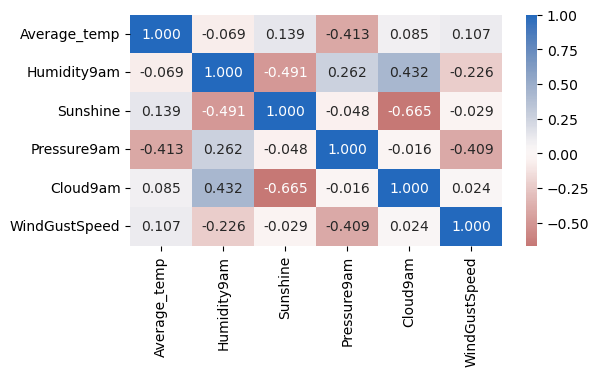

In [104]:
#relationship between Average tempreture, Humidity, SunshinePresure , Cloud and Wind Gust Speed
#correlation plot 
plt.figure(figsize = [6, 3])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

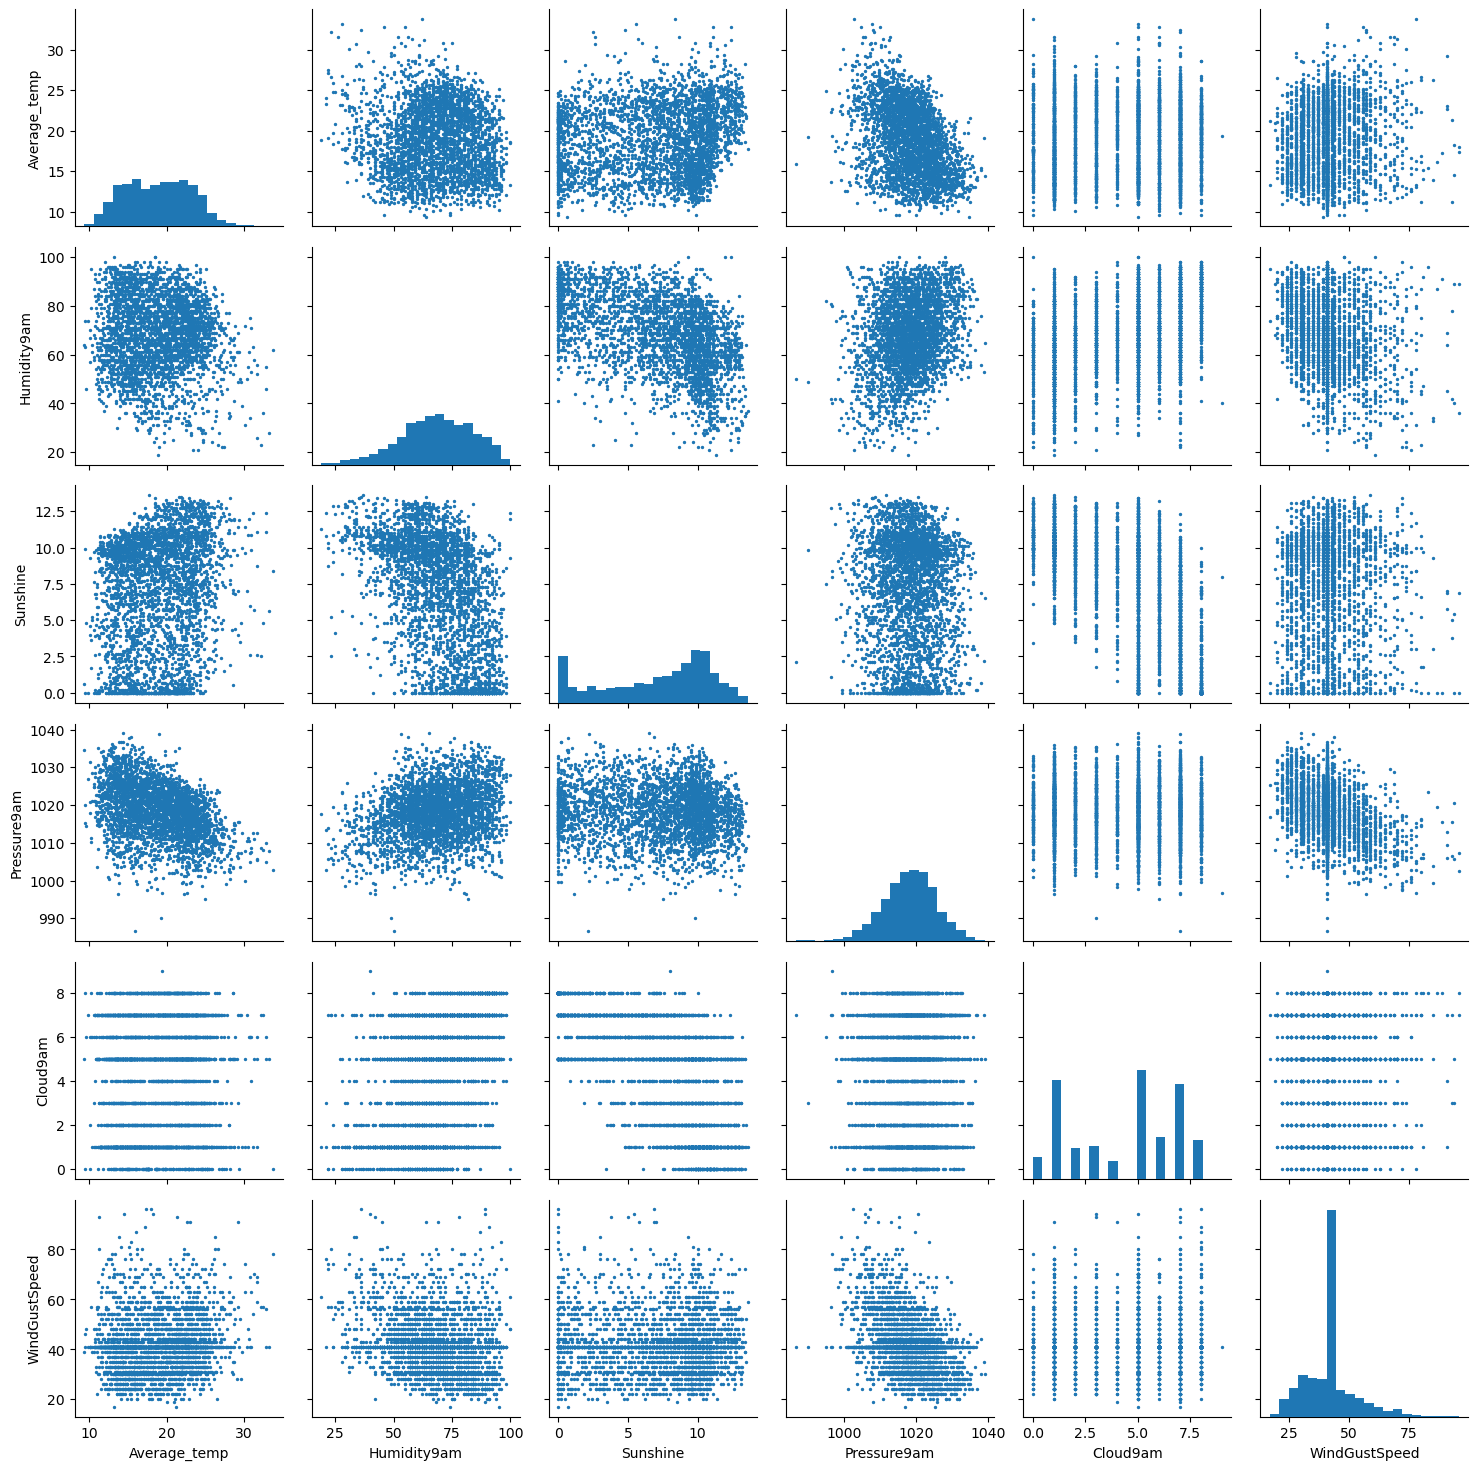

In [105]:
# matrix of scatter plots 
g = sb.PairGrid(data = df_clean, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, s = 2);

Generally, a very low/negative correlation was noticed between all the Numeric variables in the dataset. The correlation between average temperature and Humidity was negative (-0.069), likewise with the Pressure. Correlation between Average temperature and Cloud was a very low positive correlation 0.085 likewise Sunshine and Wind Gust Speed. As expected there was a strong correlation between Cloud and Humidity and there was a very strong negative correlation between Sunshine and Cloud.

## 5.3 Multivariate Exploration

### Exploring relationship between Average_tempreture and RainToday with Wind Gust Direction 

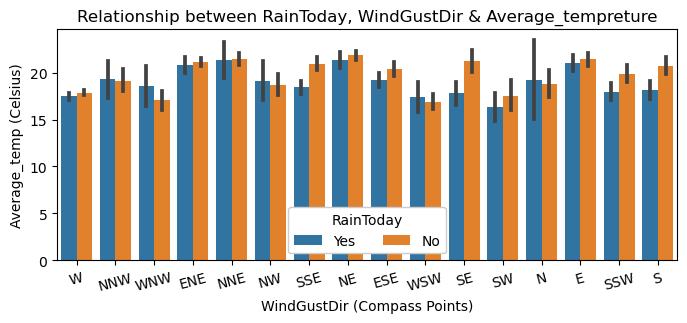

In [106]:
plt.figure(figsize = [8, 3])
ax = sb.barplot(data = df_clean, x = 'WindGustDir', y = 'Average_temp', hue = 'RainToday')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'RainToday')
plt.title("Relationship between RainToday, WindGustDir & Average_tempreture");
plt.xlabel("WindGustDir (Compass Points)");
plt.ylabel("Average_temp (Celsius)")
plt.xticks(rotation=15);

The plot above helps visualize the relationship between wind direction, average temperature, and the occurrence of rain in a concise and straightforward way. looking the chart with wind directing to the north with higher average temperature show sigh of raining when compare to lower temperature, same with North-North west which as low chances of raining when wind direct to them. Combining Average temperature have great effect of wind gust direction in determination of rainfall. 

### Let now exploy RainToday relationship with Wind Gust Direction and Average_tempreture with clustered bar chart 

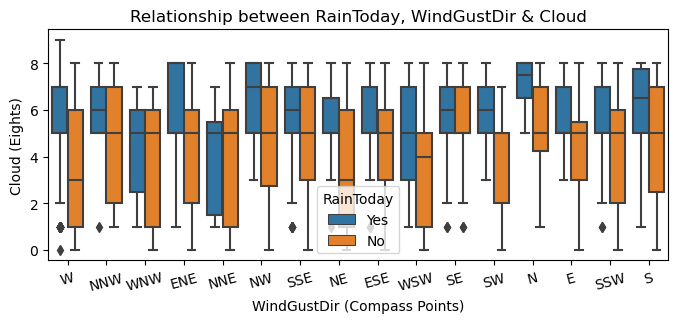

In [107]:
plt.figure(figsize=[8,3])
sb.boxplot(data=df_clean,x="WindGustDir",y="Cloud9am",hue="RainToday");
plt.xlabel("WindGustDir (Compass Points)"); 
plt.ylabel("Cloud (Eights)");
plt.title("Relationship between RainToday, WindGustDir & Cloud");
plt.xticks(rotation=15);

The box plot helps to identify any relationship between wind gust direction, cloud coverage, and the occurrence of rain in a visual way. It provided quick and easy way to compare the cloud coverage distribution for different wind gust directions and see how it varies with rain occurrence. Plotting cloud and Rain today with wind gust direction shows clearly that it rain with high cloud eights.

## 5.4 Summary of Findings

The findings suggest that there is a relationship between various weather variables and the occurrence of rain. Specifically, lower temperatures and higher humidity are associated with a higher probability of rain, while higher wind speeds and cloud coverage also increase the likelihood of rain. Wind direction and average temperature also play a role in determining the probability of rain. 

 Overall, the plots and charts illustrate that low temperature, high humidity, low sunshine hours, and high cloud coverage increase the likelihood of rain. Wind direction, on the other hand, is not a strong predictor of rain, but when combined with temperature, it can provide valuable information for determining the likelihood of rain. The correlations between the variables are generally low or negative, except for a strong correlation between cloud coverage and humidity, and a strong negative correlation between sunshine hours and cloud coverage.

# 6. Prediction With Machine Learning 

### 6.1 Transforming Categorical Variables
First, i convert categorical variables to binary variables use pandas `get_dummies()` method.

In [109]:
df_clean= pd.get_dummies(data=df_clean, columns=['RainToday', 'Average_temp', 'Cloud9am', 'WindGustDir'])
df_clean.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,S,SSW,17,...,0,0,0,0,0,0,0,1,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,W,E,9,...,0,0,0,0,0,0,0,1,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,ESE,ESE,17,...,0,0,0,0,0,0,0,1,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,NNE,E,22,...,0,0,0,0,0,0,0,1,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,NNE,W,11,...,0,0,0,0,0,0,0,1,0,0


Next, i replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. i do not use the `get_dummies` method because i would end up with two columns for 'RainTomorrow' and i do not want, since 'RainTomorrow' is our target.


In [110]:
df_clean.replace(['No', 'Yes'], [0,1], inplace=True)

### 6.2 Training Data and Test Data


#### Now, i set our `'features' or X values'` and our `'Y or target variable'`.


In [111]:
df_clean.drop(['Date', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)

In [112]:
df_clean = df_clean.astype(float)

In [113]:
X = df_clean.drop(columns='RainTomorrow', axis=1)
Y = df_clean['RainTomorrow']

In [114]:
print(X.shape)

(3271, 588)


In [115]:
df_clean.head(1)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Ploting Rainfall Against Sunshine

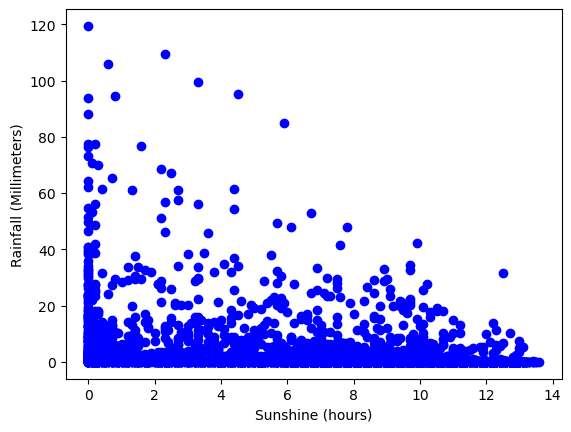

In [156]:
plt.scatter(df.Sunshine, df.Rainfall,  color='blue')
plt.xlabel("Sunshine (hours)")
plt.ylabel("Rainfall (Millimeters)")
plt.show()

# 7. Models

### 7.1 Linear Regression


#### Using the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print ('Train_set:', X_train.shape,  Y_train.shape)
print ('Test_set:', X_test.shape,  Y_test.shape)  

Train_set: (2616, 588) (2616,)
Test_set: (655, 588) (655,)


### Train data distribution

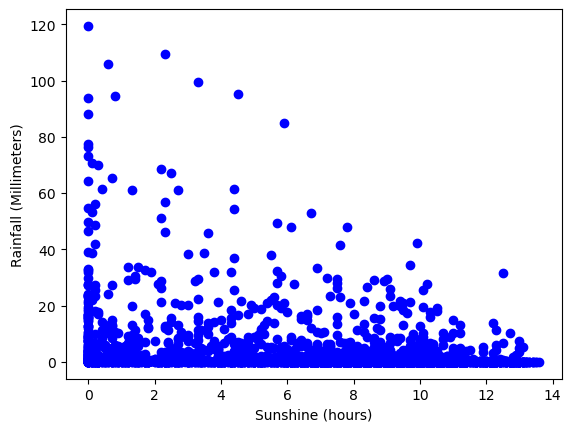

In [157]:
plt.scatter(X_train.Sunshine, X_train.Rainfall, color='blue')
plt.xlabel("Sunshine (hours)")
plt.ylabel("Rainfall (Millimeters)")
plt.show()

#### Creating and trainning a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [158]:
LinearReg = linear_model.LinearRegression()
Train_X= np.asanyarray(X_train[['WindGustSpeed', 'MaxTemp', 'Sunshine']])
Train_Y= np.asanyarray(X_train[['Rainfall']])
LinearReg.fit (Train_X,Train_Y)
# The coefficients
print ('Coefficients: ', LinearReg.coef_)

Coefficients:  [[ 0.14788372 -0.09979283 -0.70999785]]



#### Using the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [159]:
predictions = LinearReg.predict(X_test[['WindGustSpeed', 'MaxTemp', 'Sunshine']])
Test_X = np.asanyarray(X_test[['WindGustSpeed', 'MaxTemp', 'Sunshine']])
Test_Y = np.asanyarray(X_test[['Rainfall']])
print("Residual sum of squares: %.2f"
      % np.mean((predictions - Test_Y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % LinearReg.score(Test_X, Test_Y))

Residual sum of squares: 77.03
Variance score: 0.15


#### Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
LinearRegression_MAE = np.mean(np.absolute(predictions - Test_Y))
LinearRegression_MSE = np.mean(np.square(predictions - Test_Y))
LinearRegression_R2 = r2_score(predictions, Test_Y) 

#### Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [161]:
Report= {"Metrics":["MAE","MSE","R2"],"Linear_Regression": 
         [LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]}
pd.DataFrame(Report)

,Metrics,Linear_Regression
0,MAE,4.773910
1,MSE,77.032062
2,R2,-5.693785


### 7.2 K-Nearest Neighbors (KNN)


#### I calculate the `accuracy of KNN` for different values of `k` to see which `k` is the best for my model 

In [164]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.78167939, 0.80610687, 0.81832061, 0.81984733, 0.82290076,
       0.83816794, 0.83816794, 0.83358779, 0.83664122])

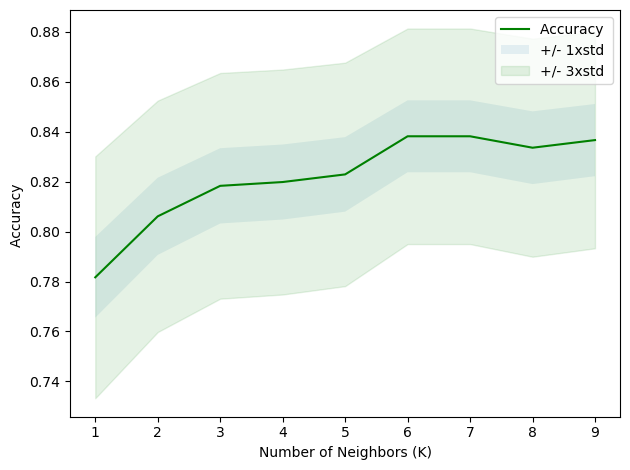

In [165]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [166]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8381679389312977 with k= 6


#### Creating and trainning a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `6`.


In [167]:
k = 6
#Train Model and Predict  
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
KNN

KNeighborsClassifier(n_neighbors=6)

#### Using the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [173]:
predictions = KNN.predict(X_test)
predictions[0:5]

array([0., 0., 1., 0., 0.])

#### Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [174]:
KNN_Accuracy_Score = metrics.accuracy_score(Y_test, predictions)
KNN_JaccardIndex = jaccard_score(Y_test, predictions, average= 'weighted')
KNN_F1_Score = f1_score(Y_test, predictions, average= 'weighted')
KNN_Log_Loss= "none"

### 7.3 Decision Tree


#### Creating and trainning a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [175]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

####  Using the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [176]:
predict = Tree.predict(X_test)
print (predict [0:5])

[0. 0. 1. 0. 0.]


#### Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [177]:
Tree_Accuracy_Score = metrics.accuracy_score(Y_test, predict)
Tree_JaccardIndex = jaccard_score(Y_test, predict, average= 'weighted')
Tree_F1_Score = f1_score(Y_test, predict, average= 'weighted')
Tree_Log_Loss= "none"

### 7.4 Logistic Regression


####  Using the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [178]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (2616, 588) (2616,)
Test set: (655, 588) (655,)


#### Creating and trainning a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [179]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

####  using the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [181]:
predictions = LR.predict(X_test)
print(predictions[0:5]) 

[0. 0. 1. 0. 0.]


In [182]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.92759421, 0.07240579],
       [0.84382622, 0.15617378],
       [0.03128515, 0.96871485],
       ...,
       [0.12206109, 0.87793891],
       [0.87249101, 0.12750899],
       [0.61651547, 0.38348453]])

#### Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [183]:
LR_Accuracy_Score = metrics.accuracy_score(Y_test, predictions)
LR_JaccardIndex = jaccard_score(Y_test, predictions,pos_label=0)
LR_F1_Score = f1_score(Y_test, predictions, average= 'weighted')
LR_Log_Loss = log_loss(Y_test, yhat_prob)

### 7.5 SVM


####  Creating and trainning a SVM model called SVM using the training data (`x_train`, `y_train`).


In [184]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train,Y_train) 

SVC()

####  using the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [186]:
predictions = SVM.predict(X_test)
predictions [0:5]

array([0., 0., 0., 0., 0.])

#### Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [187]:
SVM_Accuracy_Score = metrics.accuracy_score(Y_test, predict)
SVM_JaccardIndex = jaccard_score(Y_test, predictions,pos_label=0)
SVM_F1_Score = f1_score(Y_test, predictions, average='weighted')
SVM_Log_Loss= "none"

### 8. Report


#### Showing the Accuracy, Jaccard Index, F1-Score and LogLoss in a tabular format using data frame for all of the above models.




In [188]:
Report= {"Metrics":["Accuracy_Score","JaccardIndex","F1_Score","Log_Loss"],"KNN": 
         [KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score,KNN_Log_Loss], "Decision_Tree": 
         [Tree_Accuracy_Score,Tree_JaccardIndex,Tree_F1_Score,Tree_Log_Loss], "LR":
         [LR_Accuracy_Score,LR_JaccardIndex,LR_F1_Score,LR_Log_Loss], "SVM": 
         [SVM_Accuracy_Score,SVM_JaccardIndex,SVM_F1_Score,SVM_Log_Loss]}
pd.DataFrame(Report)

,Metrics,KNN,Decision_Tree,LR,SVM
0,Accuracy_Score,0.838168,0.81374,0.841221,0.81374
1,JaccardIndex,0.717188,0.691308,0.809174,0.719084
2,F1_Score,0.825782,0.809162,0.833983,0.601578
3,Log_Loss,none,none,0.361532,none


The report provides the evaluation metrics for four machine learning algorithms (KNN, Decision Tree, Logistic Regression, and SVM) on Weather dataset. Here is an interpretation of each metric and a comparison of the figures:

`Accuracy Score`: The accuracy score measures the proportion of correctly classified instances over the total number of instances. Based on the table, Logistic Regression (LR) and KNN have the highest accuracy score, with a value of 0.841221 and 0.838168, respectively. The Decision Tree algorithm has the lowest accuracy score, with a value of 0.81374.

`Jaccard Index`: The Jaccard index measures the similarity between two sets of data. In this case, it measures the similarity between the predicted and actual labels. Based on the table, LR has the highest Jaccard Index value of 0.809174, followed by KNN with a value of 0.717188. The Decision Tree algorithm has the lowest Jaccard Index value of 0.691308.

`F1 Score`: The F1 Score is the harmonic mean of precision and recall, with equal weight given to both. Based on the table, LR has the highest F1 Score value of 0.833983, followed by KNN with a value of 0.825782. The Decision Tree algorithm has the lowest F1 Score value of 0.809162.

`Log Loss`: The log loss measures the performance of a classification model where the predicted output is a probability value between 0 and 1. Lower values indicate better performance. Based on the table, LR has the lowest log loss value of 0.361532, while the other algorithms have no value recorded.

Overall, the report shows that LR performs consistently well across all metrics, with the highest values for accuracy, Jaccard index, and F1 score, and the lowest log loss value. KNN performs well in accuracy, Jaccard index, and F1 score, but has a relatively high log loss value. SVM has similar accuracy and Jaccard index values to KNN, but has a much lower F1 score. Decision Tree performs poorly across all metrics, with the lowest values for accuracy, Jaccard index, and F1 score.


## 9. Conclusion

Based on the findings, it can be concluded that certain weather variables such as `temperature, humidity, wind speed, cloud coverage, and sunshine` have a significant effect on rainfall. This information can be useful for predicting the likelihood of rainfall and planning for agricultural activities, water resource management, and disaster preparedness.

The evaluation of machine learning algorithms shows that `Logistic Regression (LR) and KNN` perform better than Decision Tree and SVM in predicting the possibility of rainfall. LR has the highest values for accuracy, Jaccard index, and F1 score, indicating that it is the best-performing algorithm overall. KNN also performs well in accuracy, Jaccard index, and F1 score, but has a relatively high log loss value. Decision Tree performs poorly across all metrics, indicating that it may not be the best choice for this task.

Based on these findings, it is recommended that `LR and KNN` be used for predicting the possibility of rainfall in future analyses. However, further experimentation and testing with different machine learning algorithms and datasets may provide more insights and help improve the accuracy of the predictions.